# Investigating the historical running data to evaluate my performance (Session summaries)

Many runners use third-party apps to track running activities. These apps and its companion website provide many visual charts with analytical metrics to help runners review their running performances to set up new training plans or make adjustments. In this notebook, we will extract this running data and analyse it locally using runpandas. We also take the opportunity to illustrate the runpandas methods for summarizing the historical workouts and get some valuable insights.

## Looking at the data


The example data set used in this tutorial contains 68 sessions of a single female runner from the period of 2020 until 2021.

The code chunk below loads the data using the method `runpandas.read_directory_aggregate`, which allows the user to read all the tracking files of a support format in a directory and combine them in a data frame split by sessions based on the timestamps of each activity.  It means that for each workout file will be stored in separate lines in the dataframe.

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import runpandas
session = runpandas.read_dir_aggregate(dirname='session/')

In pandas we use the ``pandas.MultiIndex`` which alows the dataframe have multiple columns as a row identifier, while having each index column related to another through a parent/child relationship. In our scenario we have the start time from each activity as the first index level and the timestamps from the activity as the second index level.

In [4]:
session

alt     hr        lon       lat
start                   time                                                 
2020-08-30 09:08:51.012 00:00:00              NaN    NaN -34.893609 -8.045055
                        00:00:01.091000       NaN    NaN -34.893624 -8.045054
                        00:00:02.091000       NaN    NaN -34.893641 -8.045061
                        00:00:03.098000       NaN    NaN -34.893655 -8.045063
                        00:00:04.098000       NaN    NaN -34.893655 -8.045065
...                                           ...    ...        ...       ...
2021-07-04 11:23:19.418 00:52:39.582000  0.050001  189.0 -34.894534 -8.046602
                        00:52:43.582000       NaN    NaN -34.894465 -8.046533
                        00:52:44.582000       NaN    NaN -34.894443 -8.046515
                        00:52:45.582000       NaN    NaN -34.894429 -8.046494
                        00:52:49.582000       NaN  190.0 -34.894395 -8.046398

[48794 rows x 4 columns]

In [5]:
session.index  #MultiIndex (start, timestamp)

MultiIndex([('2020-08-30 09:08:51.012000',        '00:00:00'),
            ('2020-08-30 09:08:51.012000', '00:00:01.091000'),
            ('2020-08-30 09:08:51.012000', '00:00:02.091000'),
            ('2020-08-30 09:08:51.012000', '00:00:03.098000'),
            ('2020-08-30 09:08:51.012000', '00:00:04.098000'),
            ('2020-08-30 09:08:51.012000', '00:00:05.096000'),
            ('2020-08-30 09:08:51.012000', '00:00:06.096000'),
            ('2020-08-30 09:08:51.012000', '00:00:07.097000'),
            ('2020-08-30 09:08:51.012000', '00:00:08.097000'),
            ('2020-08-30 09:08:51.012000', '00:00:09.102000'),
            ...
            ('2021-07-04 11:23:19.418000', '00:52:18.584000'),
            ('2021-07-04 11:23:19.418000', '00:52:22.584000'),
            ('2021-07-04 11:23:19.418000', '00:52:26.582000'),
            ('2021-07-04 11:23:19.418000', '00:52:30.582000'),
            ('2021-07-04 11:23:19.418000', '00:52:35.582000'),
            ('2021-07-04 11:23:19.41800

Now let's see how many activities there are available for analysis. For this question, we also have an acessor ``runpandas.types.acessors.session._SessionAcessor`` that holds several methods for computing the basic running metrics across all the activities and some summary statistics.

In [6]:
#count the number of activities in the session
print ('Total Activities:', session.session.count())

Total Activities: 68


We can compute the main running metrics (speed, pace, moving, etc) using the session methods available as like the ones available in the ``runpandas.types.metrics.MetricsAcessor`` . By the way, those methods are called inside each metric method, but applying in each of activities separatedely.

In [7]:
#In this example we compute the distance and the distance per position across all workouts
session = session.session.distance()
session

alt     hr        lon       lat  \
start                   time                                                    
2020-08-30 09:08:51.012 00:00:00              NaN    NaN -34.893609 -8.045055   
                        00:00:01.091000       NaN    NaN -34.893624 -8.045054   
                        00:00:02.091000       NaN    NaN -34.893641 -8.045061   
                        00:00:03.098000       NaN    NaN -34.893655 -8.045063   
                        00:00:04.098000       NaN    NaN -34.893655 -8.045065   
...                                           ...    ...        ...       ...   
2021-07-04 11:23:19.418 00:52:39.582000  0.050001  189.0 -34.894534 -8.046602   
                        00:52:43.582000       NaN    NaN -34.894465 -8.046533   
                        00:52:44.582000       NaN    NaN -34.894443 -8.046515   
                        00:52:45.582000       NaN    NaN -34.894429 -8.046494   
                        00:52:49.582000       NaN  190.0 -34.894395 -8.046398   

                                           distpos         dist  
start                   time                                     
2020-08-30 09:08:51.012 00:00:00               NaN          NaN  
                        00:00:01.091000   1.690587     1.690587  
                        00:00:02.091000   2.095596     3.786183  
                        00:00:03.098000   1.594298     5.380481  
                        00:00:04.098000   0.163334     5.543815  
...                                            ...          ...  
2021-07-04 11:23:19.418 00:52:39.582000  12.015437  8220.018885  
                        00:52:43.582000  10.749779  8230.768664  
                        00:52:44.582000   3.163638  8233.932302  
                        00:52:45.582000   2.851535  8236.783837  
                        00:52:49.582000  11.300740  8248.084577  

[48794 rows x 6 columns]

In [8]:
#comput the speed for each activity
session = session.session.speed(from_distances=True)
#compute the pace for each activity
session = session.session.pace()
#compute the inactivity periods for each activity
session = session.session.only_moving()

In [9]:
session

alt     hr        lon       lat  \
start                   time                                                    
2020-08-30 09:08:51.012 00:00:00              NaN    NaN -34.893609 -8.045055   
                        00:00:01.091000       NaN    NaN -34.893624 -8.045054   
                        00:00:02.091000       NaN    NaN -34.893641 -8.045061   
                        00:00:03.098000       NaN    NaN -34.893655 -8.045063   
                        00:00:04.098000       NaN    NaN -34.893655 -8.045065   
...                                           ...    ...        ...       ...   
2021-07-04 11:23:19.418 00:52:39.582000  0.050001  189.0 -34.894534 -8.046602   
                        00:52:43.582000       NaN    NaN -34.894465 -8.046533   
                        00:52:44.582000       NaN    NaN -34.894443 -8.046515   
                        00:52:45.582000       NaN    NaN -34.894429 -8.046494   
                        00:52:49.582000       NaN  190.0 -34.894395 -8.046398   

                                           distpos         dist     speed  \
start                   time                                                
2020-08-30 09:08:51.012 00:00:00               NaN          NaN       NaN   
                        00:00:01.091000   1.690587     1.690587  1.549576   
                        00:00:02.091000   2.095596     3.786183  2.095596   
                        00:00:03.098000   1.594298     5.380481  1.583216   
                        00:00:04.098000   0.163334     5.543815  0.163334   
...                                            ...          ...       ...   
2021-07-04 11:23:19.418 00:52:39.582000  12.015437  8220.018885  3.003859   
                        00:52:43.582000  10.749779  8230.768664  2.687445   
                        00:52:44.582000   3.163638  8233.932302  3.163638   
                        00:52:45.582000   2.851535  8236.783837  2.851535   
                        00:52:49.582000  11.300740  8248.084577  2.825185   

                                                   pace moving  
start                   time                                    
2020-08-30 09:08:51.012 00:00:00                    NaT  False  
                        00:00:01.091000 00:00:00.645337   True  
                        00:00:02.091000 00:00:00.477191   True  
                        00:00:03.098000 00:00:00.631625   True  
                        00:00:04.098000 00:00:06.122433  False  
...                                                 ...    ...  
2021-07-04 11:23:19.418 00:52:39.582000 00:00:00.332905   True  
                        00:52:43.582000 00:00:00.372100   True  
                        00:52:44.582000 00:00:00.316091   True  
                        00:52:45.582000 00:00:00.350688   True  
                        00:52:49.582000 00:00:00.353959   True  

[48794 rows x 9 columns]

After all the computation done, let's going to the next step: the exploration and get some descriptive statistics.

## Exploring the data

After the loading and metrics computation for all the activities, now let's look further the data and get the basic summaries about the sessions: time spent, total distance, mean speed and other insightful statistics in each running activity.  For this task, we may accomplish it by calling the method ``runpandas.types.session._SessionAcessor.summarize`` .  It will return a basic Dataframe including all the aggregated statistics per activity from the season frame. 

In [10]:
summary = session.session.summarize()
summary

,moving_time,mean_speed,max_speed,mean_pace,max_pace,mean_moving_speed,mean_moving_pace,mean_cadence,max_cadence,mean_moving_cadence,mean_heart_rate,max_heart_rate,mean_moving_heart_rate,mean_temperature,min_temperature,max_temperature,total_distance,ellapsed_time
start,,,,,,,,,,,,,,,,,,
2020-07-03 09:50:53.162,00:25:29.838000,2.642051,4.879655,00:06:18,00:03:24,2.665008,00:06:15,NaN,NaN,NaN,178.819923,188.0,178.872587,NaN,NaN,NaN,4089.467333,00:25:47.838000
2020-07-05 09:33:20.999,00:05:04.999000,2.227637,6.998021,00:07:28,00:02:22,3.072098,00:05:25,NaN,NaN,NaN,168.345455,176.0,168.900000,NaN,NaN,NaN,980.162640,00:07:20.001000
2020-07-05 09:41:59.999,00:18:19,1.918949,6.563570,00:08:41,00:02:32,2.729788,00:06:06,NaN,NaN,NaN,173.894180,185.0,174.577143,NaN,NaN,NaN,3139.401118,00:27:16
2020-07-13 09:13:58.718,00:40:21.281000,2.509703,8.520387,00:06:38,00:01:57,2.573151,00:06:28,NaN,NaN,NaN,170.808176,185.0,170.795527,NaN,NaN,NaN,6282.491059,00:41:43.281000
2020-07-17 09:33:02.308,00:32:07.691000,2.643278,8.365431,00:06:18,00:01:59,2.643278,00:06:18,NaN,NaN,NaN,176.436242,186.0,176.436242,NaN,NaN,NaN,5095.423045,00:32:07.691000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-13 09:22:30.985,01:32:33.018000,2.612872,23.583956,00:06:22,00:00:42,2.810855,00:05:55,NaN,NaN,NaN,169.340812,183.0,169.655879,NaN,NaN,NaN,15706.017295,01:40:11.016000
2021-06-20 09:16:55.163,00:59:44.512000,2.492640,6.065895,00:06:41,00:02:44,2.749453,00:06:03,NaN,NaN,NaN,170.539809,190.0,171.231392,NaN,NaN,NaN,9965.168311,01:06:37.837000
2021-06-23 09:37:44.000,00:26:49.001000,2.501796,5.641343,00:06:39,00:02:57,2.568947,00:06:29,NaN,NaN,NaN,156.864865,171.0,156.957031,NaN,NaN,NaN,4165.492241,00:27:45.001000


Here, some descriptive statistics:

In [11]:
summary['day_diff'] = summary.index.to_series().diff().astype('timedelta64[D]').astype('Int64') 
summary['pace_moving_all_mean'] = summary.mean_moving_pace.mean()
summary['distance_all_mean'] = round(summary.total_distance.mean()/1000,2)
summary['mean_speed'] = summary['mean_speed'] * 3.6 #convert from m/s  to km/h
summary['max_speed'] = summary['max_speed'] * 3.6 #convert from m/s  to km/h
summary['mean_moving_speed'] = summary['mean_moving_speed'] * 3.6 #convert from m/s  to km/h

In [12]:
print('Session Interval:', (summary.index.to_series().max() - summary.index.to_series().min()).days, 'days')
print('Total Workouts:', len(summary), 'runnings')
print('Tota KM Distance:', summary['total_distance'].sum() / 1000)
print('Running Intervals (average):' , round(summary.day_diff.mean(), 2), 'days')
print('Average Pace (all runs):', summary.mean_pace.mean())
print('Average Moving Pace (all runs):', summary.mean_moving_pace.mean())
print('Average KM Distance (all runs):', round(summary.total_distance.mean()/ 1000,2))

Session Interval: 366 days
Total Workouts: 68 runnings
Tota KM Distance: 491.77377537338896
Running Intervals (average): 5.0 days
Average Pace (all runs): 0 days 00:07:18.411764
Average Moving Pace (all runs): 0 days 00:06:02.147058
Average KM Distance (all runs): 7.23


As we can see above, we analyzed the period of 366 days (one year) of running workouts. In this period, she ran 68 times which achieved the total distance of 491 km! The average interval in days between two actitivies is 5 days, with average moving pace of 06'02" per km and average distance of 7.23km!  Great numbers for a starter runner!

## Exploring the data with some visualizations

At this point, I have the data to start some visualization and analysis. The first question that popped was : How was the evolution of my average moving pace through all the runs and the corresponding average?   Let's use the ``matplotlib`` package to illustrate the possible answer.

In [13]:
#let's convert the pace to float number in minutes
import datetime
summary['mean_moving_pace_float'] = summary['mean_moving_pace'] / datetime.timedelta(minutes=1)
summary['pace_moving_all_mean_float'] = summary['pace_moving_all_mean'] / datetime.timedelta(minutes=1)
#replace NA values with 0
summary['day_diff'].fillna(0, inplace=True)

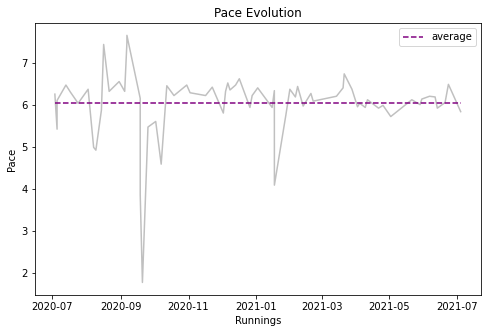

In [14]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(8, 5))

plt.plot(summary.index, summary.mean_moving_pace_float, color='silver')
plt.plot(summary.pace_moving_all_mean_float, color='purple', linestyle='dashed', label='average')
plt.title("Pace Evolution")
plt.xlabel("Runnings")
plt.ylabel("Pace")
plt.legend()

We can see some outliers at the running workouts at september 2020. Let's do some filtering (excluding those with "unreasonable" paces that might be mislabelled)

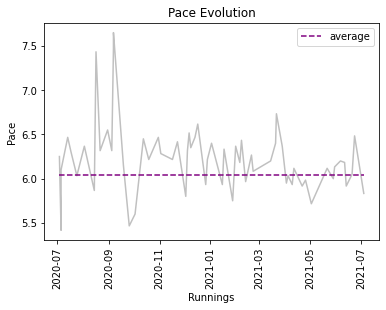

In [15]:
summary_without_outliers = summary[summary['mean_moving_pace_float'].between(5,10)]

plt.plot(summary_without_outliers.index, summary_without_outliers.mean_moving_pace_float, color='silver')
plt.plot(summary_without_outliers.pace_moving_all_mean_float, color='purple', linestyle='dashed', label='average')
plt.title("Pace Evolution")
plt.xlabel("Runnings")
plt.xticks(rotation=90)
plt.ylabel("Pace")
plt.legend()

That looks much better now. Now we can see clearly that her pace kept floating between 6'50 min and 6'00 min over all this year.  I also created a new variable at my summary dataframe called ``day_diff``, which means the interval in day between consecutive workouts. This variable helped me to see if her pace grew up as the number of the days without running also increased.  

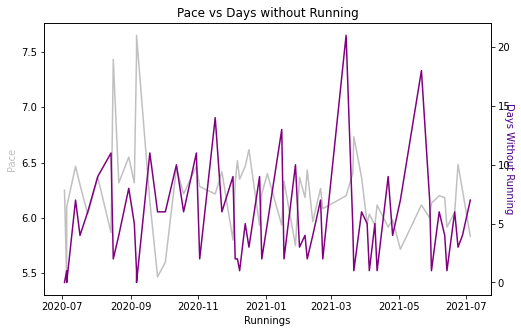

In [16]:
#recompute the day_diff removing the outliers
summary_without_outliers['day_diff'] = summary_without_outliers.index.to_series().diff().astype('timedelta64[D]').astype('Int64') 
summary_without_outliers['day_diff'].fillna(0, inplace=True)

fig,ax = plt.subplots(figsize=(8, 5))
ax.plot(summary_without_outliers.index, summary_without_outliers.mean_moving_pace_float, color='silver')
ax.set_xlabel('Runnings')
ax.set_ylabel('Pace',color='silver')
ax2=ax.twinx()
ax2.plot(summary_without_outliers.index, summary_without_outliers.day_diff.astype('int'),color='purple')
ax2.set_ylabel('Days Without Running',color='indigo', rotation=270)
plt.title('Pace vs Days without Running')
plt.show()


As we can see at the chart above, there isn't a linear correlation between the number of the days without running and her growing pace.  In her case it might be the period of rest helped her to a better recovery. Can we have a statistical evidence ?

The following code will create a regression plot of her interval of days vs pace. I will use Seaborn to create plot.  As we can see there is negative correlation between the two variables, although, it's not strong.

Text(0.5, 1.0, 'Day Diff vs Pace')

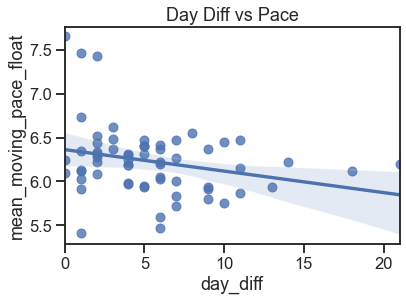

In [17]:
import seaborn as sns
sns.set(style="ticks", context="talk")
sns.regplot(x=summary_without_outliers.day_diff.astype('int'), y=summary_without_outliers.mean_moving_pace_float).set_title("Day Diff vs Pace")


Let's explore now the relationship between the mean pace and the average speed. It is obvious that the bigger the average speed the pace is lower. More fast means less time to cover the distance.

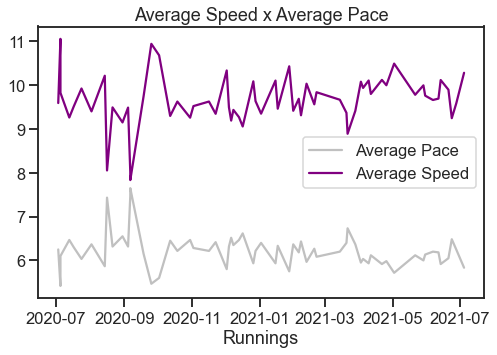

In [18]:
plt.subplots(figsize=(8, 5))

plt.plot(summary_without_outliers.index, summary_without_outliers.mean_moving_pace_float, color='silver', label='Average Pace')
plt.plot(summary_without_outliers.mean_moving_speed, color='purple', label = 'Average Speed')
plt.title("Average Speed x Average Pace")
plt.xlabel("Runnings")
plt.legend()
plt.show()

The chart below illustrates the evolution of the total distance covered at her runnings workouts. There is a higher variance of her run distances. The average distance for most of the runs is close to 7km. The second chart illustrating the histogram of the run distances show that most of her usual weekday runs are around 4-7km and my longer weekend runs (she started to run longer distances above 7kms very recently).


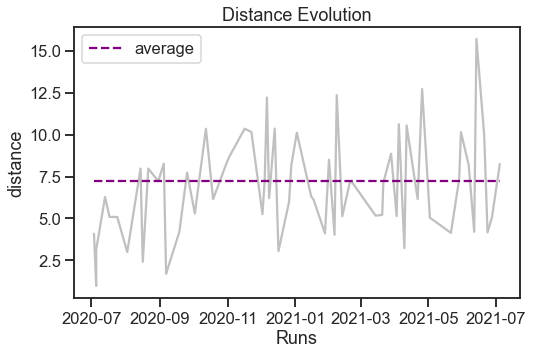

In [19]:

plt.subplots(figsize=(8, 5))

plt.plot(summary_without_outliers.index, summary_without_outliers.total_distance / 1000, color='silver')
plt.plot(summary_without_outliers.distance_all_mean, color='purple', linestyle='dashed', label='average')
plt.title("Distance Evolution")
plt.xlabel("Runs")
plt.ylabel("distance")
plt.legend()


plt.show()

<AxesSubplot:>

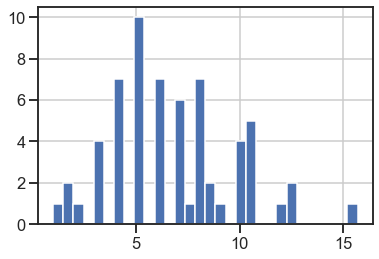

In [20]:
(summary_without_outliers['total_distance'] / 1000.0).hist(bins=30)


Now let's see how faster she was and if there is a distinction between longer and shorter runs related to the speed (slower vs faster). Let's try plotting distance against speed to get a better idea.


No handles with labels found to put in legend.


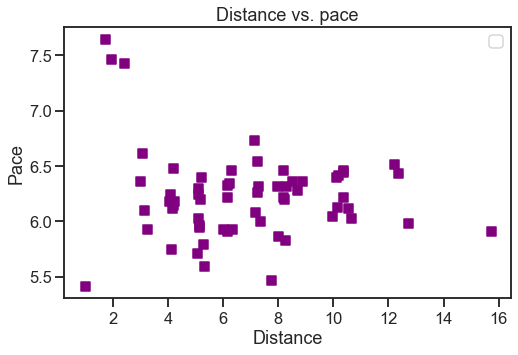

In [21]:
plt.subplots(figsize=(8, 5))

plt.scatter(summary_without_outliers.total_distance/ 1000, summary_without_outliers.mean_moving_pace_float, color='purple', marker='s')
plt.title("Distance vs. pace")
plt.xlabel("Distance")
plt.ylabel("Pace")
plt.legend()

The distribution of her pace across the distance runs is very dispersed. It means a no clear trend there. But what if we restrict it just to this year ?

In [22]:
summary_without_outliers_2021 = summary_without_outliers[summary_without_outliers.index > '2021-01-01']

In [23]:
summary_without_outliers_2021

,moving_time,mean_speed,max_speed,mean_pace,max_pace,mean_moving_speed,mean_moving_pace,mean_cadence,max_cadence,mean_moving_cadence,...,mean_temperature,min_temperature,max_temperature,total_distance,ellapsed_time,day_diff,pace_moving_all_mean,distance_all_mean,mean_moving_pace_float,pace_moving_all_mean_float
start,,,,,,,,,,,,,,,,,,,,,
2021-01-02 09:07:36.900,01:04:45,9.244853,68.900544,00:06:29,00:00:52,9.351208,00:06:24,NaN,NaN,NaN,...,NaN,NaN,NaN,10113.098986,01:05:38.100000,5,00:06:02.147058,7.23,6.400000,6.035784
2021-01-15 09:08:54.810,00:37:22.191000,10.048012,152.739973,00:05:58,00:00:23,10.106837,00:05:56,NaN,NaN,NaN,...,NaN,NaN,NaN,6305.660653,00:37:39.191000,13,00:06:02.147058,7.23,5.933333,6.035784
2021-01-17 09:41:25.270,00:38:41.730000,9.321227,23.778071,00:06:26,00:02:31,9.464527,00:06:20,NaN,NaN,NaN,...,NaN,NaN,NaN,6135.777736,00:39:29.731000,2,00:06:02.147058,7.23,6.333333,6.035784
2021-01-27 18:24:14.001,00:23:40,10.432233,20.445663,00:05:45,00:02:56,10.432233,00:05:45,NaN,NaN,NaN,...,NaN,NaN,NaN,4114.936468,00:23:40,10,00:06:02.147058,7.23,5.750000,6.035784
2021-01-31 09:18:46.676,00:53:54.324000,8.830295,49.801374,00:06:47,00:01:12,9.416889,00:06:22,NaN,NaN,NaN,...,NaN,NaN,NaN,8502.408803,00:57:46.325000,3,00:06:02.147058,7.23,6.366667,6.035784
2021-02-05 08:58:10.295,00:24:56.707000,9.690825,25.378717,00:06:11,00:02:21,9.690825,00:06:11,NaN,NaN,NaN,...,NaN,NaN,NaN,4028.979227,00:24:56.707000,4,00:06:02.147058,7.23,6.183333,6.035784
2021-02-07 09:15:40.107,01:19:07.893000,8.925130,17.529999,00:06:43,00:03:25,9.314387,00:06:26,NaN,NaN,NaN,...,NaN,NaN,NaN,12351.125311,01:23:01.894000,2,00:06:02.147058,7.23,6.433333,6.035784
2021-02-12 09:05:13.211,00:30:39.790000,10.035336,22.995251,00:05:58,00:02:36,10.035336,00:05:58,NaN,NaN,NaN,...,NaN,NaN,NaN,5128.586271,00:30:39.790000,4,00:06:02.147058,7.23,5.966667,6.035784
2021-02-19 09:12:26.076,00:45:10.925000,9.489594,54.967249,00:06:19,00:01:05,9.564430,00:06:16,NaN,NaN,NaN,...,NaN,NaN,NaN,7214.529809,00:45:36.925000,7,00:06:02.147058,7.23,6.266667,6.035784


No handles with labels found to put in legend.


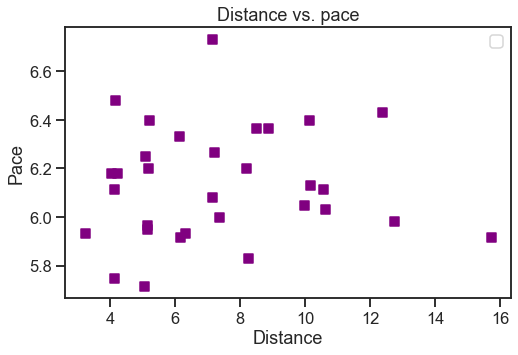

In [24]:
plt.subplots(figsize=(8, 5))

plt.scatter(summary_without_outliers_2021.total_distance/ 1000, summary_without_outliers_2021.mean_moving_pace_float, color='purple', marker='s')
plt.title("Distance vs. pace")
plt.xlabel("Distance")
plt.ylabel("Pace")
plt.legend()

It still does not give us a clear trend, but it depicts that she really started to achieve better performance when she started to run longer distances (paces loweer then 6'20 when she started to run above 10km).

Finally, let's see her performance evolution in pace over time in 5km, 10km and 15kms. For this analysis, I had to filter the session dataframe based on distances. In this tutorial, I will assume that the distances between 5km - 5.9km , 10km - 10.9km, 15km - 15.9km will be normalized as 5, 10 , 15km.

In [54]:
summary_without_outliers_5km = summary_without_outliers[summary_without_outliers['total_distance'].between(5000,5900)]
summary_without_outliers_10km = summary_without_outliers[summary_without_outliers['total_distance'].between(10000,10900)]
summary_without_outliers_15km = summary_without_outliers[summary_without_outliers['total_distance'].between(15000,15900)]

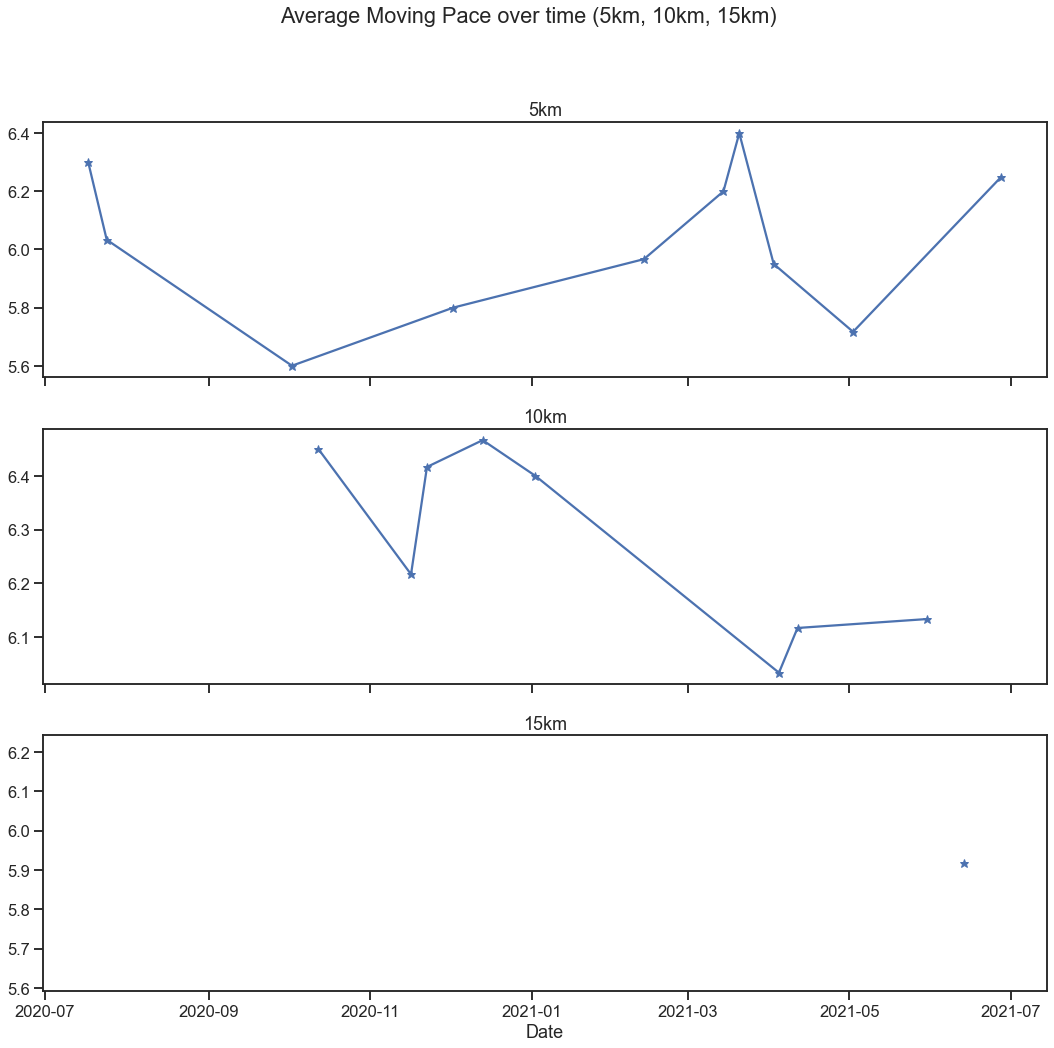

In [61]:
fig, axs = plt.subplots(3, sharex=True, figsize=(18, 16))
fig.suptitle('Average Moving Pace over time (5km, 10km, 15km)')

axs[0].plot(summary_without_outliers_5km.index, summary_without_outliers_5km.mean_moving_pace_float, marker='*')
axs[0].set_title('5km')

axs[1].plot(summary_without_outliers_10km.index, summary_without_outliers_10km.mean_moving_pace_float, marker='*')
axs[1].set_title('10km')


axs[2].plot(summary_without_outliers_15km.index, summary_without_outliers_15km.mean_moving_pace_float, marker='*')
axs[2].set_title('15km')

plt.xlabel('Date')

plt.show()

Her 5km got better until semptember 2020, but as she started to get greater distances, her performance got more slower. He 10km got better across 2021. Her 15km, since we only have one observation, there's no insight/trend there. 

## Conclusions

* So, as expected, no major insight. However, always running help he to improve her performance, in order to maintain or lower her pace.

* She started to run greater distances with excelent paces, for instance the distance run of 15km with the moving pace 5'50.

* There is no trend about her run distance vs pace. We believe that we need to collect more data to might see any new insights.

In this tutorial, we showed the possibilities of using `runpandas` python package to perform several type of running analysis assisted by visualization and data handling packages such as Matplotlib and pandas.  With the introduction of session feature, we now can analyse a group of activities and investigate new insights over time.